<a href="https://colab.research.google.com/github/ZynTran/ANN/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
import kagglehub
import os
import numpy as np
import pandas as pd
from PIL import Image
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
path = kagglehub.dataset_download("feyiamujo/human-palm-images")
print("Path to dataset files:", path)
image_size = 64
data = []
labels = []
label_names = sorted(os.listdir(path))
print("Detected classes:", label_names)
gender_df = pd.DataFrame(label_names, columns=['gender'])
gender_df['label'] = gender_df.index
for _, row in gender_df.iterrows():
    gender = row['gender']
    label = row['label']
    folder = os.path.join(path, gender)
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        if os.path.exists(img_path) and img_path.lower().endswith(('.jpg', '.jpeg', '.png')):
            img = Image.open(img_path)
            img = img.resize((image_size, image_size))
            img = np.array(img) / 255.0

            data.append(img)
            labels.append(label)
        else:
            continue
data = np.array(data)
labels = to_categorical(labels, num_classes=len(label_names))
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

100%|██████████| 924M/924M [00:11<00:00, 84.5MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/feyiamujo/human-palm-images/versions/1
Detected classes: ['FEMALE', 'MALE']
Training data shape: (640, 64, 64, 3)
Test data shape: (160, 64, 64, 3)


In [87]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
model = Sequential([
    Flatten(input_shape=(64, 64, 3)),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(len(label_names), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=15, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 131ms/step - accuracy: 0.5229 - loss: 4.6586 - val_accuracy: 0.5000 - val_loss: 1.2960
Epoch 2/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step - accuracy: 0.5000 - loss: 1.5145 - val_accuracy: 0.5000 - val_loss: 1.6479
Epoch 3/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - accuracy: 0.5188 - loss: 1.1335 - val_accuracy: 0.5875 - val_loss: 0.6533
Epoch 4/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - accuracy: 0.6005 - loss: 0.6596 - val_accuracy: 0.5000 - val_loss: 0.7472
Epoch 5/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 123ms/step - accuracy: 0.6243 - loss: 0.6922 - val_accuracy: 0.6062 - val_loss: 0.6967
Epoch 6/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - accuracy: 0.5988 - loss: 0.7886 - val_accuracy: 0.6000 - val_loss: 0.7352
Epoch 7/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step - accuracy: 0.6060 - loss: 0.7062 - val_accuracy: 0.6125 - val_loss: 0.6658
Epoch 8/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - accuracy: 0.6921 - loss: 0.5843 - val_accuracy: 0.6500 - val_loss: 

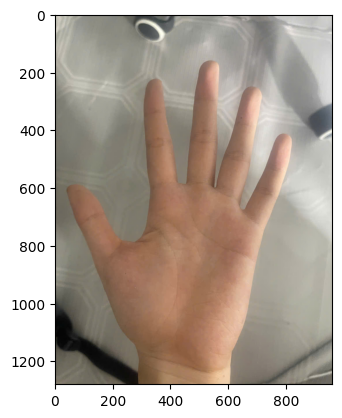

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
Tiên đoán là: FEMALE


In [90]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
img_path1 = "hand.jpg"
img = img = image.load_img(img_path1, target_size=(64, 64))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)
img = Image.open(img_path1)
plt.imshow(img)
plt.show()
prediction = model.predict(img_array)
pred_class = np.argmax(prediction)
print(f"Tiên đoán là: {label_names[pred_class]}")

In [91]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from PIL import Image
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten

path = kagglehub.dataset_download("alxmamaev/flowers-recognition")
flower_classes = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']
image_size = 64
data = []
labels = []

flower_df = pd.DataFrame(flower_classes, columns=['flower_name'])
flower_df['label'] = flower_df.index

for _, row in flower_df.iterrows():
    flower = row['flower_name']
    label = row['label']
    folder = os.path.join(path, 'flowers', flower)
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        if os.path.exists(img_path) and img_path.lower().endswith(('.jpg', '.jpeg', '.png')):
            img = Image.open(img_path)
            img = img.resize((image_size, image_size))
            img = np.array(img) / 255.0

            data.append(img)
            labels.append(label)
        else:
            continue

data = np.array(data)
labels = to_categorical(labels, num_classes=len(flower_classes))  # One-hot encoding labels

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

model = Sequential([
    Flatten(input_shape=(64, 64, 3)),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(len(flower_classes), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=15, batch_size=32, validation_data=(X_test, y_test))

Training data shape: (3453, 64, 64, 3)
Test data shape: (864, 64, 64, 3)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 12s 94ms/step - accuracy: 0.2988 - loss: 3.2825 - val_accuracy: 0.4375 - val_loss: 1.2879
Epoch 2/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 9s 83ms/step - accuracy: 0.4689 - loss: 1.2933 - val_accuracy: 0.4618 - val_loss: 1.2825
Epoch 3/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 10s 92ms/step - accuracy: 0.4708 - loss: 1.2803 - val_accuracy: 0.4595 - val_loss: 1.2677
Epoch 4/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 10s 92ms/step - accuracy: 0.4798 - loss: 1.2216 - val_accuracy: 0.4468 - val_loss: 1.3111
Epoch 5/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 10s 90ms/step - accuracy: 0.5316 - loss: 1.1563 - val_accuracy: 0.4502 - val_loss: 1.2585
Epoch 6/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 9s 79ms/step - accuracy: 0.5196 - loss: 1.1354 - val_accuracy: 0.4641 - val_loss: 1.2705
Epoch 7/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 11s 84ms/step - accuracy: 0.5424 - loss: 1.1135 - val_accuracy: 0.4514 - val_loss: 1.2706
Epoch 8/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 11s 90ms/step - accuracy: 0.5445 - loss: 1.0943 - va

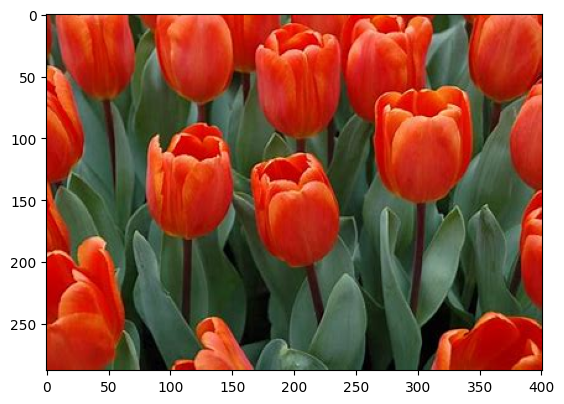

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Tiên đoán là: tulip


In [93]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
img_path1 = "tulip.jpg"
img = img = image.load_img(img_path1, target_size=(64, 64))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)
img = Image.open(img_path1)
plt.imshow(img)
plt.show()
prediction = model.predict(img_array)
pred_class = np.argmax(prediction)
print(f"Tiên đoán là: {flower_classes[pred_class]}")

In [19]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("nguyentrongdai/vietnamese-currency")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/vietnamese-currency


In [24]:
import kagglehub
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from PIL import Image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

path = kagglehub.dataset_download("nguyentrongdai/vietnamese-currency")
image_size = 64
data = []
labels = []
banknotes_classes = sorted(os.listdir(os.path.join(path, 'dataset')))
banknotes_df = pd.DataFrame(banknotes_classes, columns=['banknotes'])
banknotes_df['banknotes_label'] = banknotes_df.index

for _, row in banknotes_df.iterrows():
    banknote_name = row['banknotes']
    banknote_label = row['banknotes_label']
    folder = os.path.join(path, 'dataset', banknote_name)
    if not os.path.isdir(folder):
        continue
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        if os.path.exists(img_path) and img_path.lower().endswith(('.jpg', '.jpeg', '.png')):
            img = Image.open(img_path)
            img = img.resize((image_size, image_size))
            img = np.array(img)
            data.append(img)
            labels.append(banknote_label)
        else:
            continue
data = np.array(data)
labels = to_categorical(labels, num_classes=len(banknotes_classes))
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

model = Sequential([
    Flatten(input_shape=(image_size, image_size, 3)),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(len(banknotes_classes), activation='softmax')])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=15, batch_size=32, validation_data=(X_test, y_test))

Training data shape: (2169, 64, 64, 3)
Test data shape: (543, 64, 64, 3)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/15
68/68 ━━━━━━━━━━━━━━━━━━━━ 9s 103ms/step - accuracy: 0.1100 - loss: 2091.1399 - val_accuracy: 0.2247 - val_loss: 136.5088
Epoch 2/15
68/68 ━━━━━━━━━━━━━━━━━━━━ 10s 101ms/step - accuracy: 0.1976 - loss: 148.1165 - val_accuracy: 0.2302 - val_loss: 92.2483
Epoch 3/15
68/68 ━━━━━━━━━━━━━━━━━━━━ 6s 83ms/step - accuracy: 0.2723 - loss: 73.0035 - val_accuracy: 0.2357 - val_loss: 61.0923
Epoch 4/15
68/68 ━━━━━━━━━━━━━━━━━━━━ 11s 96ms/step - accuracy: 0.3188 - loss: 42.3649 - val_accuracy: 0.2855 - val_loss: 31.6538
Epoch 5/15
68/68 ━━━━━━━━━━━━━━━━━━━━ 10s 96ms/step - accuracy: 0.3638 - loss: 28.5700 - val_accuracy: 0.1455 - val_loss: 39.9268
Epoch 6/15
68/68 ━━━━━━━━━━━━━━━━━━━━ 6s 81ms/step - accuracy: 0.2591 - loss: 28.4254 - val_accuracy: 0.3131 - val_loss: 20.9625
Epoch 7/15
68/68 ━━━━━━━━━━━━━━━━━━━━ 7s 99ms/step - accuracy: 0.3676 - loss: 12.1182 - val_accuracy: 0.3297 - val_loss: 15.0821
Epoch 8/15
68/68 ━━━━━━━━━━━━━━━━━━━━ 6s 81ms/step - accuracy: 0.3803 - loss: 12.2115 - 

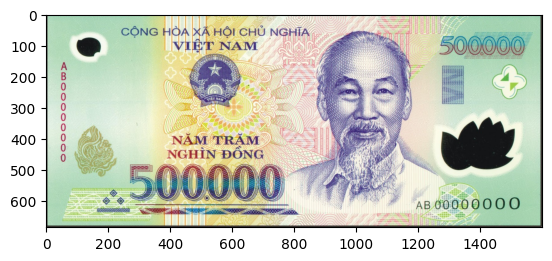

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
Tiên đoán là: 000200


In [27]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
img_path = "500k.jpg"
img = img = image.load_img(img_path, target_size=(64, 64))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)
img = Image.open(image_path)
plt.imshow(img)
plt.show()
prediction = model.predict(img_array)
pred_class = np.argmax(prediction)
print(f"Tiên đoán là: {banknotes_classes[pred_class]}")

In [61]:
import kagglehub
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from PIL import Image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
path = kagglehub.dataset_download("nguyentrongdai/vietnamese-foods-dataset")
path = os.path.join(path, "dataset")
dishes_classes = ['banh_xeo', 'banh_bot_loc', 'banh_cong', 'banh_da_lon', 'banh_khot']
image_size = 64
data = []
labels = []
dishes_df = pd.DataFrame(dishes_classes, columns=['dishes'])
dishes_df['dishes_label'] = dishes_df.index
for _, row in dishes_df.iterrows():
    dish = row['dishes']
    label = row['dishes_label']
    folder = os.path.join(path, dish)
    if not os.path.isdir(folder):
        continue
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        if os.path.exists(img_path) and img_path.lower().endswith(('.jpg', '.jpeg', '.png')):
            try:
                img = Image.open(img_path).convert('RGB')
                img = img.resize((image_size, image_size))
                img = np.array(img) / 255.0
                data.append(img)
                labels.append(label)
            except Exception as e:
                continue
data = np.array(data)
labels = to_categorical(labels, num_classes=len(dishes_classes))
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")
model = Sequential([
    Flatten(input_shape=(image_size, image_size, 3)),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(len(dishes_classes), activation='softmax')])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Training data shape: (1145, 64, 64, 3)
Test data shape: (287, 64, 64, 3)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 86ms/step - accuracy: 0.2035 - loss: 7.8947 - val_accuracy: 0.3206 - val_loss: 1.5299
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - accuracy: 0.3810 - loss: 1.5023 - val_accuracy: 0.4286 - val_loss: 1.3893
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 106ms/step - accuracy: 0.4533 - loss: 1.3249 - val_accuracy: 0.3972 - val_loss: 1.4871
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - accuracy: 0.4522 - loss: 1.3620 - val_accuracy: 0.4077 - val_loss: 1.3366
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - accuracy: 0.4662 - loss: 1.3427 - val_accuracy: 0.3380 - val_loss: 1.4289
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 107ms/step - accuracy: 0.5167 - loss: 1.1751 - val_accuracy: 0.4251 - val_loss: 1.4474
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - accuracy: 0.5175 - loss: 1.2136 - val_accuracy: 0.4878 - val_loss: 1.2527
Epoch 8/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step - accuracy: 0.6314 - loss: 1.0112 - val_accuracy: 0.5052 -

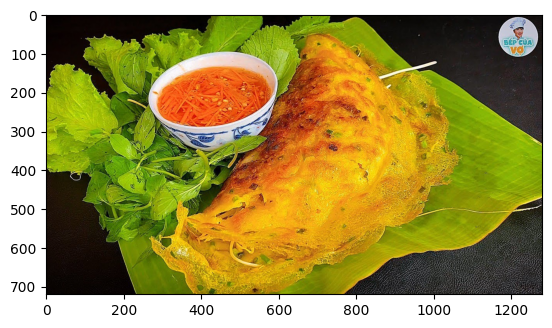

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Tiên đoán là: banh_xeo


In [66]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
img_path1 = "banh xeo.jpg"
img = img = image.load_img(img_path1, target_size=(64, 64))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)
img = Image.open(img_path1)
plt.imshow(img)
plt.show()
prediction = model.predict(img_array)
pred_class = np.argmax(prediction)
print(f"Tiên đoán là: {dishes_classes[pred_class]}")

In [82]:
import kagglehub
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from PIL import Image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
base_path = kagglehub.dataset_download("zeyadkhalid/faceshape-processed")
dataset_path = os.path.join(base_path, "dataset")
train_path = os.path.join(dataset_path, "train")
face_classes = [folder for folder in os.listdir(train_path) if os.path.isdir(os.path.join(train_path, folder))]
face_classes.sort()
print("Detected classes:", face_classes)

image_size = 64
data = []
labels = []
faces_df = pd.DataFrame(face_classes, columns=['faces'])
faces_df['faces_label'] = faces_df.index
for _, row in faces_df.iterrows():
    face = row['faces']
    label = row['faces_label']
    folder = os.path.join(path, dish)
    if not os.path.isdir(folder):
        continue
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        if os.path.exists(img_path) and img_path.lower().endswith(('.jpg', '.jpeg', '.png')):
            try:
                img = Image.open(img_path).convert('RGB')
                img = img.resize((image_size, image_size))
                img = np.array(img) / 255.0
                data.append(img)
                labels.append(label)
            except Exception as e:
                continue
data = np.array(data)
labels = to_categorical(labels, num_classes=len(face_classes))
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")
model = Sequential([
    Flatten(input_shape=(image_size, image_size, 3)),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(len(dishes_classes), activation='softmax')])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Detected classes: ['Heart', 'Oblong', 'Oval', 'Round', 'Square']
Training data shape: (1200, 64, 64, 3)
Test data shape: (300, 64, 64, 3)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - accuracy: 0.1637 - loss: 6.4607 - val_accuracy: 0.2133 - val_loss: 2.0728
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - accuracy: 0.2031 - loss: 1.8535 - val_accuracy: 0.0867 - val_loss: 2.0753
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - accuracy: 0.2277 - loss: 1.8421 - val_accuracy: 0.1167 - val_loss: 1.8992
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - accuracy: 0.2106 - loss: 1.7443 - val_accuracy: 0.2067 - val_loss: 2.1234
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 80ms/step - accuracy: 0.1841 - loss: 1.8724 - val_accuracy: 0.1867 - val_loss: 1.9057
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 97ms/step - accuracy: 0.1953 - loss: 1.7452 - val_accuracy: 0.0633 - val_loss: 1.7807
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - accuracy: 0.2031 - loss: 1.6562 - val_accuracy: 0.1300 - val_loss: 1.7539
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - accuracy: 0.2462 - loss: 1.6056 - val_accuracy: 0.1400 - v

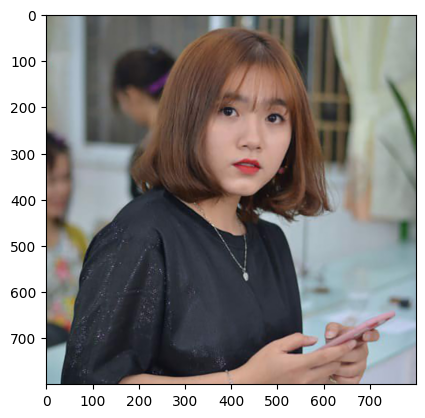

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Tiên đoán là: Round


In [85]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
img_path1 = "mat1.jpg"
img = img = image.load_img(img_path1, target_size=(64, 64))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)
img = Image.open(img_path1)
plt.imshow(img)
plt.show()
prediction = model.predict(img_array)
pred_class = np.argmax(prediction)
print(f"Tiên đoán là: {face_classes[pred_class]}")